# À l'origine : le sac de mots

## Données

Repartons des données que nous avons mis en forme, et amenons progressivement une analyse plus avancée

In [1]:
import pandas as pd
df = pd.read_excel("../data/data_hal_crest_clean.xlsx")
df.head()

,Unnamed: 0,docid,title,abstract,abstract_eng,publicationDate_tdate,document_type,authors,date,abstract_net,title_net,texte,taille,cont_IA,cont_algo,cont_ml
0,0,3026577,"[""The effect of price magnitude on analysts' f...",['Recent research in finance shows that the ma...,['Recent research in finance shows that the ma...,2021-01-01T00:00:00Z,shs.eco,"['Tristan Roger', 'Wael Bousselmi', 'Patrick R...",2021-01-01,Recent research in finance shows that the magn...,The effect of price magnitude on analysts' for...,The effect of price magnitude on analysts' for...,822,False,False,False
1,1,4358212,['Model-based Clustering with Missing Not At R...,"['Model-based unsupervised learning, as any le...","['Model-based unsupervised learning, as any le...",2024-06-18T00:00:00Z,stat.ml,"['Aude Sportisse', 'Matthieu Marbac', 'Fabien ...",2024-06-18,"Model-based unsupervised learning, as any lear...",Model-based Clustering with Missing Not At Ran...,Model-based Clustering with Missing Not At Ran...,1409,False,True,False
2,2,4996040,['Inferring the parameters of Taylor’s power l...,['Taylor’s power law of fluctuation scaling ha...,['Taylor’s power law of fluctuation scaling ha...,2025-11-26T00:00:00Z,stat,"['Lionel Truquet', 'Joel E. Cohen', 'Paul Douk...",2025-11-26,Taylor’s power law of fluctuation scaling has ...,Inferring the parameters of Taylor’s power law...,Inferring the parameters of Taylor’s power law...,1570,False,False,False
3,3,5357551,['Nonparametric intensity estimation of spatia...,['We propose a random forest estimator for the...,['We propose a random forest estimator for the...,2025-11-10T00:00:00Z,stat.me,"['Christophe Biscio', 'Frédéric Lavancier']",2025-11-10,We propose a random forest estimator for the i...,Nonparametric intensity estimation of spatial ...,Nonparametric intensity estimation of spatial ...,814,False,False,False
4,4,3026615,['Impact of the Brexit vote announcement on lo...,['We examine how the Brexit announcement influ...,['We examine how the Brexit announcement influ...,2020-01-01T00:00:00Z,shs.eco,"['Wael Bousselmi', 'Patrick Sentis', 'Marc Wil...",2020-01-01,We examine how the Brexit announcement influen...,Impact of the Brexit vote announcement on long...,Impact of the Brexit vote announcement on long...,759,False,False,False


## Transformer le texte en nombres : le comptage de mots

- Détecter des patterns : regex https://regex101.com/
- Découper en mots et les compter
    - C'est quoi un mot ?
    - Comment on compte ?

### Avant le mot : le pattern

In [4]:
import re
c=re.compile(r"\bmodel\b",re.I)
c.findall("This is a model.")

['model']

In [5]:
df["contains_model"] = df["texte"].apply(lambda x: bool(c.search(x)))
df["contains_model"].value_counts()

contains_model
False    1601
True      707
Name: count, dtype: int64

### Découper en mots

In [7]:
df["texte"].apply(lambda x: x.split(" ")).head()

0    [The, effect, of, price, magnitude, on, analys...
1    [Model-based, Clustering, with, Missing, Not, ...
2    [Inferring, the, parameters, of, Taylor’s, pow...
3    [Nonparametric, intensity, estimation, of, spa...
4    [Impact, of, the, Brexit, vote, announcement, ...
Name: texte, dtype: object

### Utiliser NLTK

In [8]:
#pip install nltk

In [8]:
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
texte = "Ceci est un test. Coucou, je fais du Python. N'est-ce-pas?"
word_tokenize(texte, language="french")

[nltk_data] Downloading package punkt to /Users/emilien/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


['Ceci',
 'est',
 'un',
 'test',
 '.',
 'Coucou',
 ',',
 'je',
 'fais',
 'du',
 'Python',
 '.',
 "N'est-ce-pas",
 '?']

Compter les bigrams

In [9]:
from nltk.tokenize import word_tokenize
from nltk.util import ngrams

def generate_bigrams_nltk(text):
    tokens = word_tokenize(text.lower())
    bigrams = list(ngrams(tokens, 2))
    return bigrams

generate_bigrams_nltk(texte)

[('ceci', 'est'),
 ('est', 'un'),
 ('un', 'test'),
 ('test', '.'),
 ('.', 'coucou'),
 ('coucou', ','),
 (',', 'je'),
 ('je', 'fais'),
 ('fais', 'du'),
 ('du', 'python'),
 ('python', '.'),
 ('.', "n'est-ce-pas"),
 ("n'est-ce-pas", '?')]

### Préprocessing : nettoyer les données

- Beaucoup d'opérations de nettoyage, spécifiques à chaque tache

In [10]:
nltk.download("stopwords")

from nltk.corpus import stopwords

english_stopwords = list(set(stopwords.words("english")))


def generate_bigrams_nltk(text):
    tokens = word_tokenize(text.lower())
    filtered_tokens = [token for token in tokens if token.isalnum() and token not in english_stopwords]
    bigrams = list(ngrams(filtered_tokens, 2))
    return bigrams

generate_bigrams_nltk(df.loc[0, "texte"])


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/emilien/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


[('effect', 'price'),
 ('price', 'magnitude'),
 ('magnitude', 'analysts'),
 ('analysts', 'forecasts'),
 ('forecasts', 'evidence'),
 ('evidence', 'lab'),
 ('lab', 'recent'),
 ('recent', 'research'),
 ('research', 'finance'),
 ('finance', 'shows'),
 ('shows', 'magnitude'),
 ('magnitude', 'stock'),
 ('stock', 'prices'),
 ('prices', 'influences'),
 ('influences', 'analysts'),
 ('analysts', 'price'),
 ('price', 'forecasts'),
 ('forecasts', 'roger'),
 ('roger', 'et'),
 ('et', '2018'),
 ('2018', 'paper'),
 ('paper', 'report'),
 ('report', 'results'),
 ('results', 'fa'),
 ('fa', 'novel'),
 ('novel', 'experiment'),
 ('experiment', 'participants'),
 ('participants', 'continuous'),
 ('continuous', 'double'),
 ('double', 'auction'),
 ('auction', 'market'),
 ('market', 'act'),
 ('act', 'analysts'),
 ('analysts', 'forecast'),
 ('forecast', 'future'),
 ('future', 'prices'),
 ('prices', 'participants'),
 ('participants', 'engage'),
 ('engage', 'two'),
 ('two', 'successive'),
 ('successive', 'markets')

## DTM : document term matrix

Rapide avec Scikit-learn

In [20]:
#pip install scikit-learn

In [11]:
from sklearn.feature_extraction.text import CountVectorizer

# créer mon object de ML
vectorizer = CountVectorizer(stop_words=english_stopwords, 
                             ngram_range=(1, 1), 
                             max_features=800)

# appliquer sur les données
X = vectorizer.fit_transform(df["texte"])
X = pd.DataFrame(X.toarray(),columns=list(vectorizer.get_feature_names_out()))
X

,10,abc,access,account,accès,achieve,across,activité,adaptive,additional,...,économie,économique,économiques,également,étude,étudie,étudions,été,évaluation,être
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2303,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2304,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2305,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2306,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Une version un peu plus avancée

- Term Frequency-Inverse Document Frequency
    - Amélioration du DTM
- Approche souvent utilisée pour mettre en valeur les mots les plus spécifiques
- `Scikit-learn` a `TfidfVectorizer`

$$\text{TF-IDF}(t, d, D) = \left( \frac{f_{t,d}}{n_d} \right) \times \log \left(\frac{N}{\text{df}_t} \right)
$$

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords

stopwords_english = list(set(stopwords.words("english")))

# créer un objet
vectorizer = TfidfVectorizer(stop_words=stopwords_english, 
                             ngram_range=(1, 1), 
                             max_features=500)

# applique 
X = vectorizer.fit_transform(df["texte"])

# mettre en forme
X = pd.DataFrame(X.toarray(),columns=list(vectorizer.get_feature_names_out()))
X

,account,across,activité,adaptive,agents,ai,ainsi,al,algorithm,algorithms,...,women,work,workers,years,économie,également,étude,étudie,été,être
0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.107267,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
1,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.089346,0.098306,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
2,0.0,0.093473,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
3,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
4,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2303,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.0,0.094333,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
2304,0.0,0.000000,0.0,0.0,0.0,0.0,0.062792,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.070612,0.0
2305,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
2306,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0


Les mots les plus significatifs

In [14]:
X.loc[120].sort_values()

account        0.000000
pricing        0.000000
prices         0.000000
price          0.000000
present        0.000000
                 ...   
novel          0.212056
dimensional    0.216164
search         0.228812
based          0.391602
data           0.468934
Name: 120, Length: 500, dtype: float64

Distance entre deux éléments

In [16]:
from sklearn.metrics.pairwise import cosine_similarity
cosine_similarity(X.loc[120, :].values.reshape(1, -1), 
                  X.loc[124, :].values.reshape(1, -1))

array([[0.06932448]])

Toutes les distances, et récupérer le document le plus proche

In [20]:
from sklearn.metrics.pairwise import pairwise_distances

distances = pd.DataFrame(pairwise_distances(X, metric="cosine"))
distances[199].idxmax()

3

### Application avec le clustering

Créer la matrice de distances

In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

Z = linkage(X.values, method='ward') 

Représenter la figure

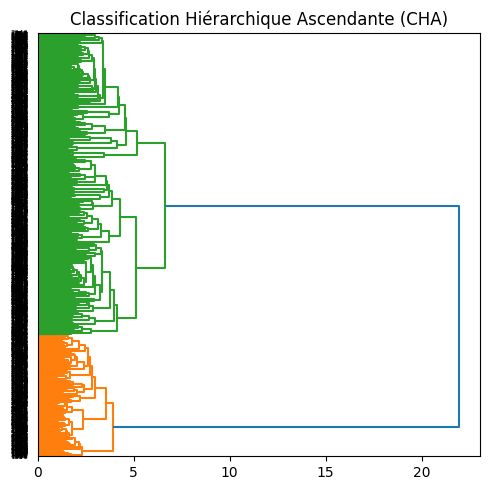

In [22]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5, 5))
dendrogram(Z, orientation='right')
plt.title("Classification Hiérarchique Ascendante (CHA)")
plt.tight_layout()
plt.show()

Clustering

In [70]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=5,  linkage='ward')
labels = cluster.fit_predict(X.values)
df['cluster'] = labels

Contenu des clusters

In [74]:
df_w = pd.DataFrame(X.values, 
                    columns=vectorizer.get_feature_names_out()) 
df_w[df["cluster"] == 2].max().sort_values()[-20:]

mean           0.661694
choice         0.668790
period         0.668915
estimator      0.671385
noise          0.686070
al             0.696043
selection      0.700581
markov         0.700924
test           0.710667
sampling       0.718675
regression     0.724830
bayesian       0.744733
empirical      0.754944
log            0.769228
local          0.805665
processes      0.812487
matrix         0.820876
diffusion      0.838852
statistics     0.850877
conditional    0.897499
dtype: float64

## Application : Faire un nuage de mots avec WordCloud

Un coup d'oeil à la [documentation](https://amueller.github.io/word_cloud/)